# Wide ResNet 28 10 with Cutout, without probability

# 1. Environment Setup
## 1.0. Check GPU

In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


## 1.1. Install matplotlib

In [2]:
!pip install matplotlib

## 1.2. Import

In [3]:
import torch, torchvision, augmentation, train
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Ignore Warning
import warnings
warnings.filterwarnings(action='ignore')

# 2. Data Preprocessing

In [4]:
batch_size = 128
cifar_dir = '../../../../data/OCR/Jason/cifar10/'

In [5]:
pre_transform = [transforms.RandomCrop(32, padding=4), transforms.RandomHorizontalFlip()]
post_transform = [augmentation.Cutout(1, 8), 
                  transforms.ToTensor(), transforms.Normalize(mean=[0.4921, 0.4828, 0.4474], std=[0.1950, 0.1922, 0.1940])]

train_transform = transforms.Compose(pre_transform + post_transform)

test_transform = transforms.Compose([transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.4921, 0.4828, 0.4474], std=[0.1950, 0.1922, 0.1940])])

train_dataset = torchvision.datasets.CIFAR10(cifar_dir, train=True, download=False, transform=train_transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=False)

test_dataset = torchvision.datasets.CIFAR10(cifar_dir, train=False, download=False, transform=test_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False, pin_memory=False)

# 3. Train Model

In [6]:
depth = 28
widen_factor = 10
dropout_rate = 0.3
num_classes = 10

gpu_id = 6

print_freq = 60
epoch_print = 10

save = False
epochs = 201

lr = 0.1
momentum = 0.9
weight_decay = 0.0005
nesterov = True
milestones = [60, 120, 160]

In [7]:
WRN_28_10 = train.Wide_ResNet(depth, widen_factor, dropout_rate, num_classes, gpu_id, print_freq, epoch_print)
WRN_28_10.train(train_loader, test_loader, save, epochs, lr, momentum, weight_decay, nesterov, milestones)

Epoch 1 Started...

*********************************** Best Acc Updated ***********************************
Iteration : 60 - Train Loss : 1.8030, Test Loss : 1.9852, Train Acc : 31.2500, Test Acc : 26.1200

*********************************** Best Acc Updated ***********************************
Iteration : 120 - Train Loss : 1.7183, Test Loss : 1.8775, Train Acc : 40.6250, Test Acc : 32.5000

*********************************** Best Acc Updated ***********************************
Iteration : 180 - Train Loss : 1.6486, Test Loss : 1.7599, Train Acc : 39.8438, Test Acc : 39.6000

*********************************** Best Acc Updated ***********************************
Iteration : 240 - Train Loss : 1.4902, Test Loss : 1.6372, Train Acc : 53.9062, Test Acc : 41.3900
Iteration : 300 - Train Loss : 1.6127, Test Loss : 1.6831, Train Acc : 39.8438, Test Acc : 41.0300

*********************************** Best Acc Updated ***********************************
Iteration : 360 - Train Loss : 1.3558

Iteration : 360 - Train Loss : 0.1143, Test Loss : 0.2187, Train Acc : 96.0938, Test Acc : 93.2000
Epoch 111 Started...
Iteration : 60 - Train Loss : 0.1559, Test Loss : 0.3015, Train Acc : 95.3125, Test Acc : 91.4000
Iteration : 120 - Train Loss : 0.2050, Test Loss : 0.2045, Train Acc : 91.4062, Test Acc : 93.4600
Iteration : 180 - Train Loss : 0.2336, Test Loss : 0.2034, Train Acc : 92.1875, Test Acc : 93.6100
Iteration : 240 - Train Loss : 0.2059, Test Loss : 0.2447, Train Acc : 94.5312, Test Acc : 92.5900
Iteration : 300 - Train Loss : 0.2291, Test Loss : 0.2448, Train Acc : 93.7500, Test Acc : 92.3300

*********************************** Best Acc Updated ***********************************
Iteration : 360 - Train Loss : 0.1629, Test Loss : 0.1864, Train Acc : 93.7500, Test Acc : 94.0300
Epoch 121 Started...

*********************************** Best Acc Updated ***********************************
Iteration : 60 - Train Loss : 0.0794, Test Loss : 0.1412, Train Acc : 96.8750, Test Ac

Text(0, 0.5, 'Accuracy')

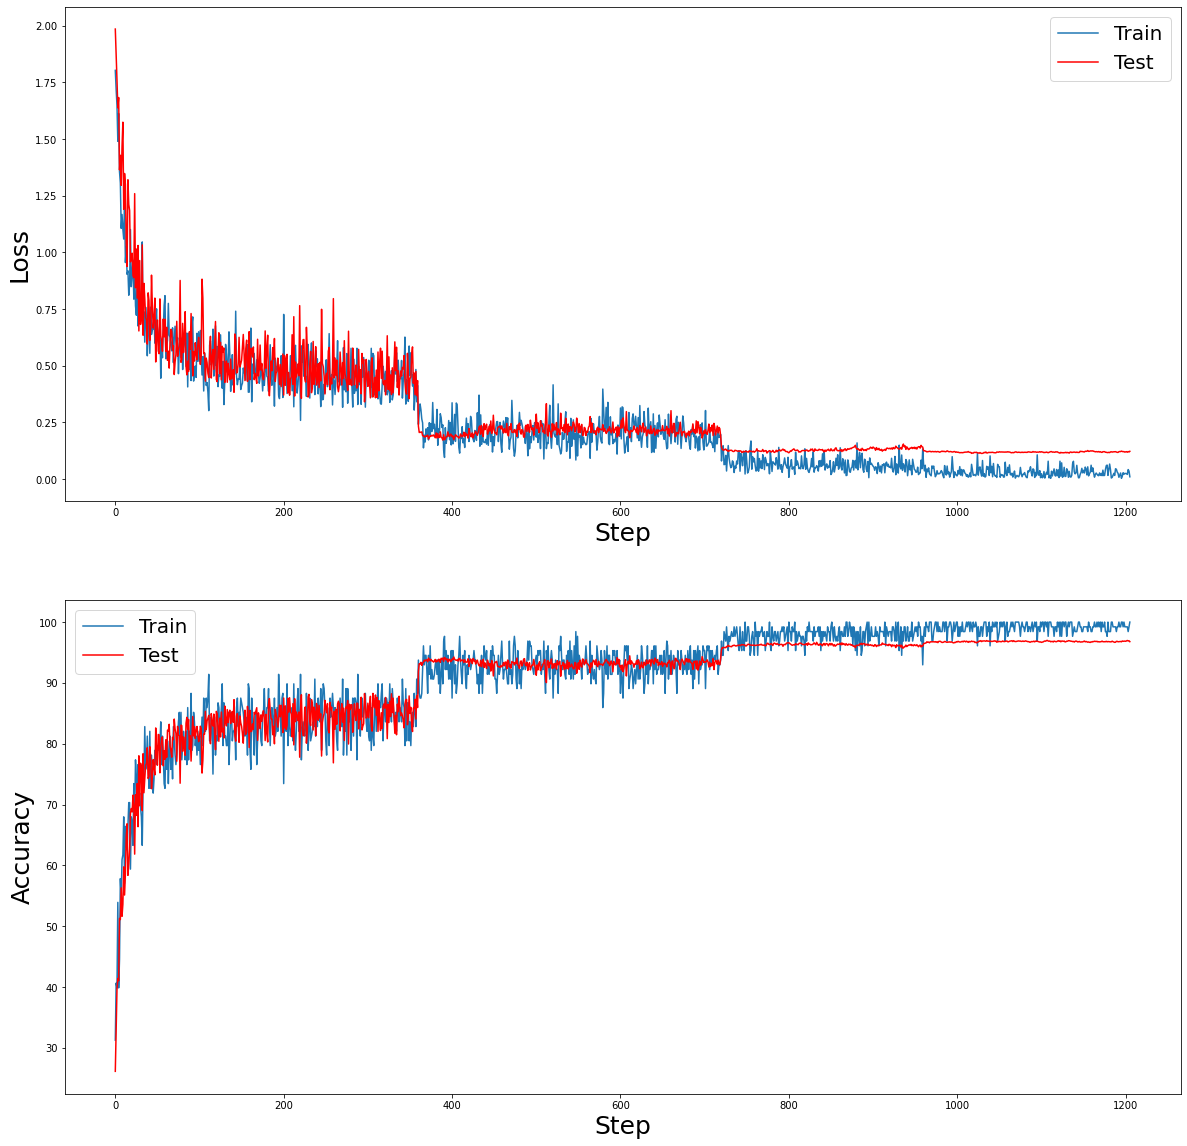

In [8]:
plt.figure(figsize=(20, 20))
plt.rcParams['axes.titlesize'] = 30
plt.axis('off')

label_fontsize = 25

plt.subplot(2, 1, 1)
train_lossline, = plt.plot(WRN_28_10.train_losses, label='Train')
test_lossline, = plt.plot(WRN_28_10.test_losses, color='red', label='Test')
plt.legend(handles=[train_lossline, test_lossline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)

plt.subplot(2, 1, 2)
train_accline, = plt.plot(WRN_28_10.train_acc, label='Train')
test_accline, = plt.plot(WRN_28_10.test_acc, color='red', label='Test')
plt.legend(handles=[train_accline, test_accline], fontsize=20)
plt.xlabel('Step', fontsize=label_fontsize)
plt.ylabel('Accuracy', fontsize=label_fontsize)